In [31]:
#importing all important packages
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline

In [32]:
data = pd.read_csv('../Data/ramen-ratings.csv') #reading the data and save it into a variable
data.head(10) #show the first 10 rows of the data

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.5,NaN


In [33]:
#checking total rows and column in our data
data.shape

(2580, 7)

We know that we have 7 columns in our data. Which are:

1. Review : unique numbers that inform the review order from the latest
2. Brand : Ramen brand
3. Variety: variation of ramen
4. Style : style of ramen
5. Country: Where the ramen is available
6. Stars : Ramen ratings
7. Top Ten: ramen achievement

## Data Cleaning ##
Let's check if there are data missing in our data

In [34]:
data.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

We know that in the Style column we have 2 missing data. And Top Ten data tells us that if the ramen doesn't get 'Top Ten' achievement, then the data will be blank. Since we only have 2 missing data, we can drop it.

In [35]:
data = data.dropna(subset=['Style'])
print(data["Style"].isna().sum())

0


In [36]:
data.shape

(2578, 7)

## Frequency ##
Let's see all styles in Style column

In [37]:
data['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

Now we use value_counts() to count each unique Ramen Style.

In [38]:
vc = data['Style'].value_counts()
vc

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

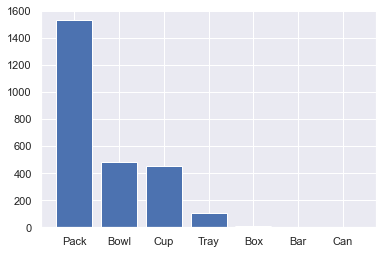

In [39]:
plt.bar(vc.keys(),vc)
plt.show

Pack Style is the most used style. Now let's see all countries in Country column.

In [40]:
print(data["Country"].unique())
print(len(data["Country"].unique()), 'Countries')
print()
country_vc = data['Country'].value_counts()


['Japan' 'Taiwan' 'USA' 'India' 'South Korea' 'Singapore' 'Thailand'
 'Hong Kong' 'Vietnam' 'Ghana' 'Malaysia' 'Indonesia' 'China' 'Nigeria'
 'Germany' 'Hungary' 'Mexico' 'Fiji' 'Australia' 'Pakistan' 'Bangladesh'
 'Canada' 'Nepal' 'Brazil' 'UK' 'Myanmar' 'Netherlands' 'United States'
 'Cambodia' 'Finland' 'Sarawak' 'Philippines' 'Sweden' 'Colombia'
 'Estonia' 'Holland' 'Poland' 'Dubai']
38 Countries



<BarContainer object of 38 artists>

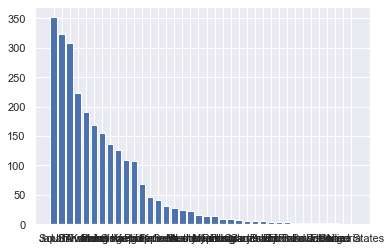

In [41]:
plt.bar(country_vc.keys(),country_vc)

In [42]:
country_vc

Japan            352
USA              323
South Korea      309
Taiwan           223
Thailand         191
China            168
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Fiji               4
Poland             4
Holland            4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Estonia            2
Ghana              2
Nigeria            1
United States      1
Name: Country, dtype: int64

## The Top 10 ##
Let's see all top 10 ramen for each year.

In [43]:
top10 = data.dropna()
top10

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9


Take a look at the data. We found '\n' or newline in our data. Maybe it accidentally happened. So we easily filter the data using selection.

In [44]:
top10 = top10[top10['Top Ten'] != '\n'] #if the data in Top Ten column contains '\n' we can ignore it
top10 = top10.sort_values('Top Ten' ) #and we sort it by year
top10

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2475,105,Indomie,Special Fried Curly Noodle,Pack,Indonesia,5,2012 #1
1972,608,Koka,Spicy Black Pepper,Pack,Singapore,5,2012 #10
2533,47,Indomie,Mi Goreng Jumbo Barbecue Chicken,Pack,Indonesia,5,2012 #2
2188,392,Nissin,Yakisoba Noodles Karashi,Tray,Japan,5,2012 #3
2567,13,Sapporo Ichiban,Chow Mein,Pack,Japan,5,2012 #4
2146,434,Mi Sedaap,Kari Spesial,Pack,Indonesia,4.5,2012 #5
2189,391,Myojo,Hyoubanya No Chukasoba Oriental,Pack,Japan,4.25,2012 #6
2002,578,Nongshim,Shin Ramyun Black,Pack,South Korea,4.75,2012 #7
2295,285,Doll,Artificial Chicken,Pack,Hong Kong,4.5,2012 #9
1588,992,Prima Taste,Singapore Laksa La Mian,Pack,Singapore,5,2013 #1


## Top 10 Ramen Brand by total products ##
Top 10 Ramen brands that have the most products.

In [45]:
data['Brand'].value_counts()[:10]

Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     52
Ottogi            46
Lucky Me!         34
Name: Brand, dtype: int64

## Top 50 Ramen Ratings by brands ##
We will calculate the average rating for each brand, and then we'll show who is in top 50.

In [46]:
#First, let's see how many ramen brands are in our data
print(len(data['Brand'].unique()))

355


In [47]:
data.dtypes

Review #     int64
Brand       object
Variety     object
Style       object
Country     object
Stars       object
Top Ten     object
dtype: object

Let's see if Stars column has invalid value.

In [48]:
for s in data['Stars']:
    s = float(s)
    print(s)

3.75
1.0
2.25
2.75
3.75
4.75
4.0
3.75
0.25
2.5
5.0
5.0
4.25
4.5
5.0
3.5
3.75
5.0
4.0
4.0
4.25
5.0
5.0
4.75
4.25
4.25
3.5
4.75
5.0
4.0
5.0
4.5


ValueError: could not convert string to float: 'Unrated'

In [49]:
for s in data['Stars']:
    try:
        s = float(s)
    except:
        print(s)

Unrated
Unrated
Unrated


Okay, we found anomalies in our data. Some ramen don't have ratings. We can drop it from our data.

In [50]:
data = data[data['Stars'] != 'Unrated']
print(data[data['Stars'] == 'Unrated']['Stars'].sum()) #make sure if there are no 'Unrated'

0


In [51]:
brands = list(data['Brand'].unique())
counter = [0.0]*len(brands)

brands_cnt = dict(zip(brands, counter)) #create dictionary to count all ratings and then save the averages

for brand in brands:
    brands_data = data[data['Brand'] == brand]
    for star in brands_data['Stars']:
        brands_cnt[brand] += float(star) #count all ratings
    brands_cnt[brand] /= len(brands_data) #average

In [52]:
top50ratings = [] #list for saving the brand name and its average rating
for key, values in brands_cnt.items():
    top50ratings.append([key,values])

#print the top 50 ramen ratings by brand
top50ratings = sorted(top50ratings, key = lambda x : x[1], reverse = True) #sorting values in descending order
top50ratings
for i in range(50):
    print('#{:<3}{:25} {}'.format(i+1, top50ratings[i][0], round(top50ratings[i][1],2)))

#1  Tao Kae Noi               5.0
#2  Jackpot Teriyaki          5.0
#3  Prima                     5.0
#4  Takamori                  5.0
#5  The Ramen Rater Select    5.0
#6  Kiki Noodle               5.0
#7  Daifuku                   5.0
#8  Patanjali                 5.0
#9  Nyor Nyar                 5.0
#10 ORee Garden               5.0
#11 Prima Taste               5.0
#12 MyOri                     5.0
#13 Seven & I                 5.0
#14 Torishi                   5.0
#15 ChoripDong                5.0
#16 The Bridge                5.0
#17 Plats Du Chef             5.0
#18 Kimura                    5.0
#19 Peyang                    5.0
#20 Komforte Chockolates      5.0
#21 Daddy                     5.0
#22 Song Hak                  5.0
#23 Foodmon                   5.0
#24 Higashi                   5.0
#25 MyKuali                   4.95
#26 CarJEN                    4.93
#27 TTL                       4.92
#28 Nanyang Chef              4.88
#29 Mom's Dry Noodle          4.83
#30 Tseng

## Data Visualisation ##
Now we move into interesting part. First, we make count plots to see value counts for each country

### Count PLot ###

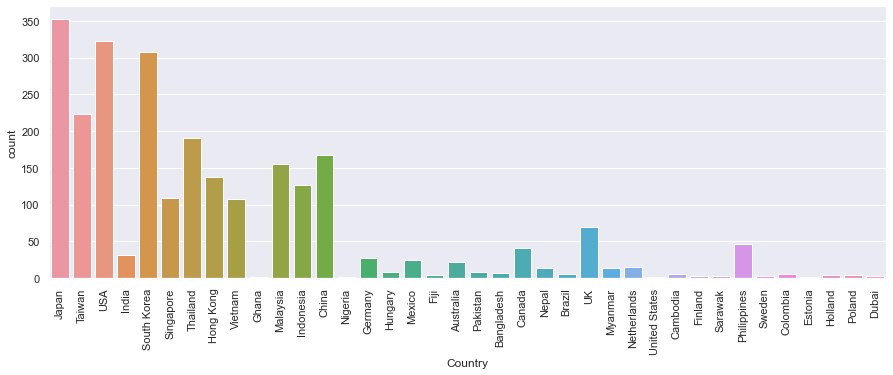

In [53]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(1,1,figsize = (15,5))
sns.countplot(x = 'Country', data = data)
plt.xticks(rotation=90)

plt.show()

### Pie Plot ###
If you want to plot something about percentage, then Pie Plot is a right choice. let's find out the percentage of total ramen based on style first.

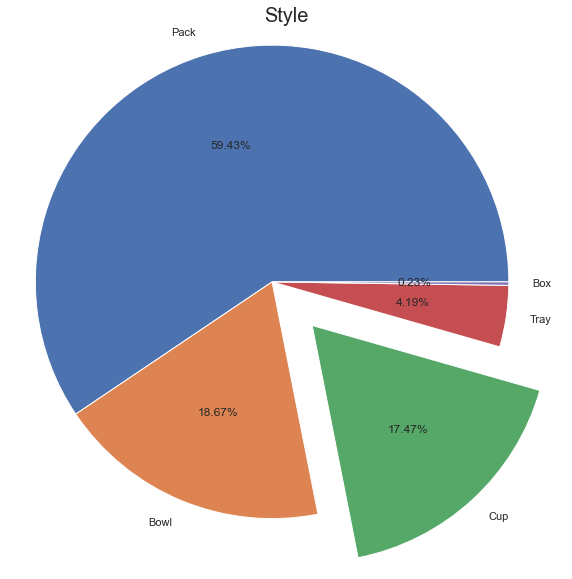

In [54]:
labels = 'Pack', 'Bowl', 'Cup' , 'Tray', 'Box' #We can't include 'Bar' and 'Can' because they only appear once in our data.
size = [1531, 481, 450, 108, 6]
exp = [0,0,0.25,0,0]
f, ax = plt.subplots(1,1, figsize= (10,10))

ax.pie(size, labels = labels, autopct = '%1.2f%%', startangle = 0,explode=exp)
ax.axis('equal')
ax.set_title("Style", size = 20)

plt.show()

In [55]:
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [56]:
data = data[data.Stars!='Unrated']
ratings = np.float32(data.Stars)
cleandata = data.drop(['Review #','Top Ten','Stars'],axis=1)
cleandata.head()

,Brand,Variety,Style,Country
0,New Touch,T's Restaurant Tantanmen,Cup,Japan
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan
4,Ching's Secret,Singapore Curry,Pack,India


In [57]:
cleandata.dtypes

Brand      object
Variety    object
Style      object
Country    object
dtype: object

In [58]:
for field in range(0,len(cleandata.dtypes)):
    if cleandata.dtypes[field]=='object':
        uniquelabels = cleandata.iloc[:,field].unique()
        cleanup_nums = dict(zip(uniquelabels,range(len(uniquelabels))))
        cleandata.replace(cleanup_nums, inplace=True)




In [59]:
cleandata.head(50)

,Brand,Variety,Style,Country
0,0,0,0,0
1,1,1,1,1
2,2,2,0,2
3,3,3,1,1
4,4,4,1,3
5,5,5,1,4
6,6,6,0,0
7,7,7,2,0
8,8,8,1,0
9,9,9,1,5


In [60]:
cleandata.dtypes

Brand      int64
Variety    int64
Style      int64
Country    int64
dtype: object

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(cleandata, ratings, test_size=0.2, random_state=80)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2060, 4) (515, 4) (2060,) (515,)


In [67]:
model = LinearRegression()
model.fit(np.asarray(X_train),np.asarray(y_train))

LinearRegression()

Coefficients: 
 [-0.00125443 -0.00031298  0.05431937 -0.01664975]
Mean squared error: 0.94
Variance score: 0.07


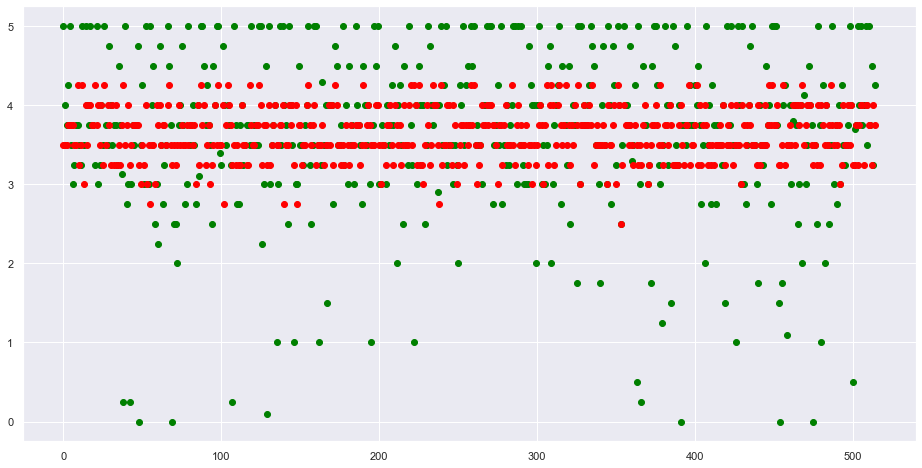

In [68]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
temp = y_pred / 0.25
temp = np.around(temp)
y_pred = temp * 0.25
# print(y_pred)
# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
fig=plt.figure(figsize=(16, 8))
plt.scatter(range(len(y_test)), y_test, color='green')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.show()

Coefficients: 
 [-0.00125443 -0.00031298  0.05431937 -0.01664975]
Mean squared error: 0.94
Variance score: 0.09


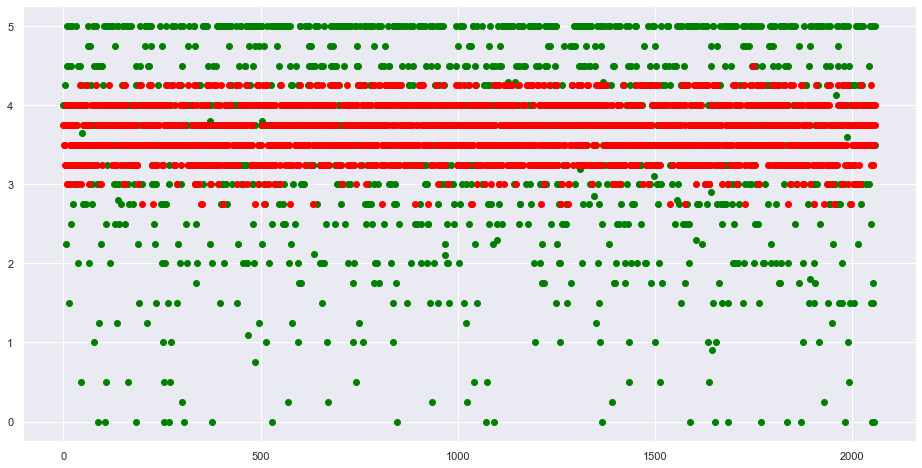

In [69]:
# Make predictions using the testing set
y_pred = model.predict(X_train)
temp = y_pred / 0.25
temp = np.around(temp)
y_pred = temp * 0.25
# print(y_pred)
# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train, y_pred))

# Plot outputs
fig=plt.figure(figsize=(16, 8))
plt.scatter(range(len(y_train)), y_train, color='green')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.show()